In [ ]:
1.Basic Data Understanding (Pandas):

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/DELL/Downloads/Indian_Kids_Screen_Time.csv")

In [116]:
df.head()  #Displaying the first 10 rows.

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [117]:
print("Shape:",df.shape) #print shape of the dataset
print("Columns:",df.columns) #print column name
print("Data type:",df.dtypes)  #print data types

Shape: (9712, 8)
Columns: Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')
Data type: Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object


In [118]:
print(df.isnull().sum()) #count missing values

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [119]:
print(df.duplicated().sum())  #count the duplicates

44


In [120]:
Gender_count=df['Gender'].value_counts()
print(Gender_count)

Gender
Male      4942
Female    4770
Name: count, dtype: int64


In [121]:
Urban_Rural_count=df['Urban_or_Rural'].value_counts()
print(Urban_Rural_count)

Urban_or_Rural
Urban    6851
Rural    2861
Name: count, dtype: int64


In [122]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


2.Data cleaning:

In [123]:
df['limits']=df['Exceeded_Recommended_Limit'].map({True:1,False:0}) #convert Exceeded_Recommended_Limit into numeric (1 for True, 0 for False)
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,limits
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,1
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,1
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,1
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,1


In [124]:
# Replace missing categorical values with 'Unknown'
df = df.fillna({'Gender': 'Unknown'})

In [125]:
if 'ScreenTime' in df.columns:
    df = df[df['ScreenTime'] <= 0]
if 'Age' in df.columns:
    df = df[df['Age'] <= 0]

In [126]:
# Reset index
df = df.reset_index(drop=True)

In [127]:
df=pd.read_csv(r'c:\Users\DELL\Downloads\Indian_Kids_Screen_Time.csv',encoding='latin1')
df['Gender_convert']=df['Gender'].map({'Male':'M','Female':'F'}) #convert Gender into numeric (M for Male, F for Female)
df.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Gender_convert
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,M
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,F
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,F
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,F
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,F
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,F
6,17,Male,2.97,TV,False,0.48,NaN,Rural,M
7,10,Male,2.74,TV,True,0.54,NaN,Urban,M
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,M
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban,M


In [128]:
print(df[df['Age']<10])  #print the kids age is lessthen 10

      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
19      9  Female                      0.00             TV   
22      9  Female                      1.63         Tablet   
24      8    Male                      3.19         Tablet   
28      8    Male                      0.31     Smartphone   
43      9    Male                      7.61             TV   
...   ...     ...                       ...            ...   
9691    8  Female                      2.26             TV   
9703    9    Male                      6.62     Smartphone   
9704    8  Female                      4.23             TV   
9705    9  Female                      8.07             TV   
9706    8    Male                      4.84     Smartphone   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
19                         False                               0.42   
22                         False                               0.58   
24                          True          

In [129]:
a=(df['Age']<10).sum() #count the age is lessthan 10
print(a)

1797


In [130]:
# Function to assign category
def categorize_screen_time(hours):
    if 1 <= hours < 3:
        return "Low"
    elif 3 <= hours < 6:
        return "Moderate"
    elif 6 <= hours <= 10:
        return "High"
    else:
        return "Other"   # for values outside 1–10

# Apply function to create new column
df['Screen_Time_Category'] = df['Avg_Daily_Screen_Time_hr'].apply(categorize_screen_time)

print(df[['Avg_Daily_Screen_Time_hr', 'Screen_Time_Category']].head(10))

   Avg_Daily_Screen_Time_hr Screen_Time_Category
0                      3.99             Moderate
1                      4.61             Moderate
2                      3.73             Moderate
3                      1.21                  Low
4                      5.89             Moderate
5                      4.88             Moderate
6                      2.97                  Low
7                      2.74                  Low
8                      4.61             Moderate
9                      3.24             Moderate


In [ ]:
3. Exploratory Data Analysis (EDA):

In [131]:
total_kids=df.shape[0] #count total number of kids
print(total_kids)

9712


In [132]:
avg_screen_time=df['Avg_Daily_Screen_Time_hr'].mean() #average screen time per day
print(avg_screen_time)

4.3528366968698515


In [136]:
bins = [0, 6, 12, 18]   # groups: 0–6, 7–12, 13–18
labels = ['0-6', '7-12', '13-18']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
age_group_dist = df.groupby('Age_Group', observed=False)['Avg_Daily_Screen_Time_hr'].mean()


In [137]:
# 4. Distribution of screen time by gender
gender_dist = df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean()
print("\nScreen time distribution by Gender:\n", gender_dist)


Screen time distribution by Gender:
 Gender
Female    4.327021
Male      4.377754
Name: Avg_Daily_Screen_Time_hr, dtype: float64


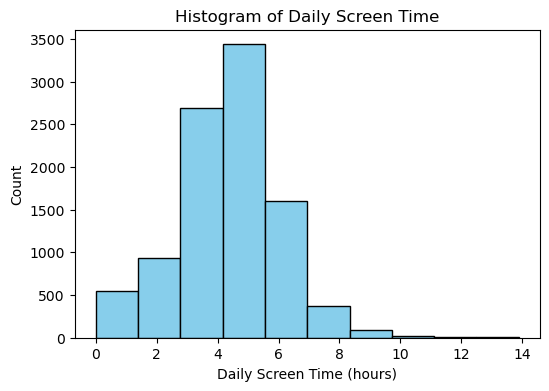

In [138]:
# Histogram of daily screen time
plt.figure(figsize=(6,4))
plt.hist(df['Avg_Daily_Screen_Time_hr'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Daily Screen Time")
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Count")
plt.show()

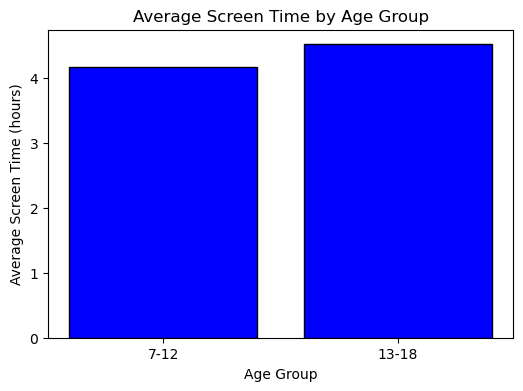

In [139]:
# Bar chart of average screen time by age group
plt.figure(figsize=(6,4))
plt.bar(age_group_dist.index.astype(str), age_group_dist.values, color='blue', edgecolor='black')
plt.title("Average Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Screen Time (hours)")
plt.show()

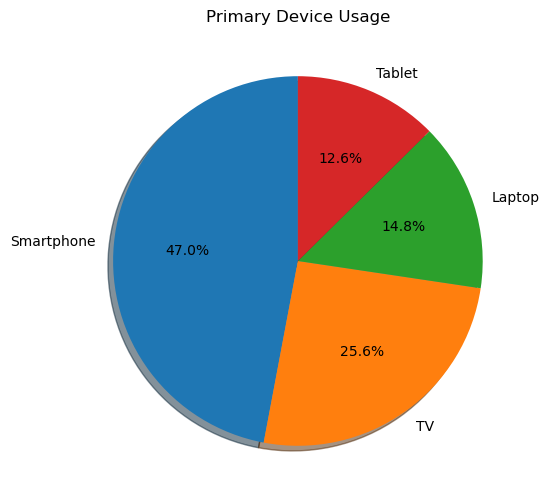

In [140]:
# Pie chart of device usage (if available)
if 'Primary_Device' in df.columns:
    plt.figure(figsize=(6,6))
    df['Primary_Device'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
    plt.title("Primary Device Usage")
    plt.ylabel("")  # hide y-label
    plt.show()

In [141]:
#Group-wise Analysis Urban vs Rural
print(df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean())


Urban_or_Rural
Rural    4.373702
Urban    4.344123
Name: Avg_Daily_Screen_Time_hr, dtype: float64


In [142]:
#Group-wise Analysis Health Impacts
print(df.groupby('Health_Impacts')['Avg_Daily_Screen_Time_hr'].mean())

Health_Impacts
Anxiety                                          4.903403
Anxiety, Obesity Risk                            4.648841
Eye Strain                                       4.809301
Eye Strain, Anxiety                              5.081185
Eye Strain, Anxiety, Obesity Risk                4.993429
Eye Strain, Obesity Risk                         4.949811
Obesity Risk                                     4.911151
Poor Sleep                                       4.955445
Poor Sleep, Anxiety                              4.906283
Poor Sleep, Anxiety, Obesity Risk                5.060641
Poor Sleep, Eye Strain                           4.883207
Poor Sleep, Eye Strain, Anxiety                  4.911667
Poor Sleep, Eye Strain, Anxiety, Obesity Risk    4.548378
Poor Sleep, Eye Strain, Obesity Risk             4.818617
Poor Sleep, Obesity Risk                         5.015376
Name: Avg_Daily_Screen_Time_hr, dtype: float64


In [143]:
print(pd.crosstab(df['Gender'], df['Primary_Device'])) #count primary devices gender wise

Primary_Device  Laptop  Smartphone    TV  Tablet
Gender                                          
Female             741        2221  1218     590
Male               692        2347  1269     634


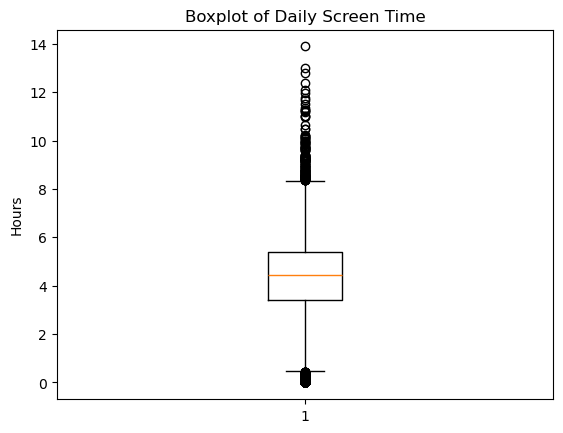

In [144]:
# Boxplot – Spread of Screen Time
plt.boxplot(df['Avg_Daily_Screen_Time_hr'])
plt.title("Boxplot of Daily Screen Time")
plt.ylabel("Hours")
plt.show()

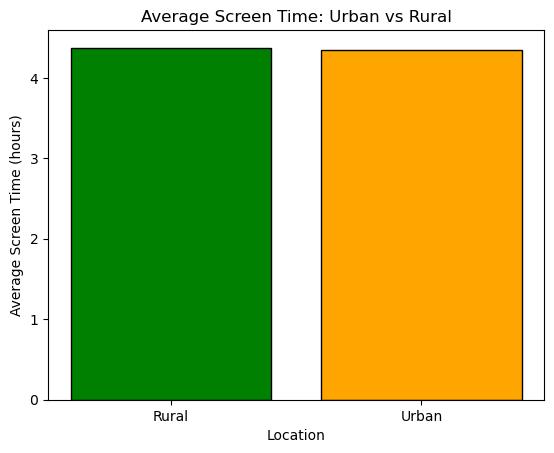

In [145]:
urban_rural_avg = df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean()
plt.bar(urban_rural_avg.index, urban_rural_avg.values, color=['green','orange'], edgecolor='black')
plt.title("Average Screen Time: Urban vs Rural")
plt.xlabel("Location")
plt.ylabel("Average Screen Time (hours)")
plt.show()

In [ ]:
4. Statistics:

In [146]:
#Mean, Median, Mode of Screen Time
mean_val = df['Avg_Daily_Screen_Time_hr'].mean()
median_val = df['Avg_Daily_Screen_Time_hr'].median()
mode_val = df['Avg_Daily_Screen_Time_hr'].mode()[0]
print(mean_val)
print(median_val)
print(mode_val)

4.3528366968698515
4.44
0.0


In [147]:
#Probability that a random kid spends > 3 hrs
prob_of_3 = (df['Avg_Daily_Screen_Time_hr'] > 3).mean()
print(prob_of_3)

0.819501647446458


In [148]:
#Probability kid is below 10 yrs & spends > 2 hrs
prob_age_2_to_10 = ((df['Age'] < 10) & (df['Avg_Daily_Screen_Time_hr'] > 2)).mean()
print( prob_age_2_to_10)

0.1371499176276771


In [149]:
#Convert Screen Time column into a NumPy array
screen_time = df['Avg_Daily_Screen_Time_hr'].to_numpy()
print(screen_time)


[3.99 4.61 3.73 ... 5.62 5.6  6.12]


In [ ]:
5. Linear Algebra & NumPy:

In [150]:
#Create a random Engagement Score array (same size)
score = np.random.randint(1, 10, size=screen_time.shape[0])
print("Engagement Score Array:\n",score)

Engagement Score Array:
 [5 9 4 ... 2 8 6]


In [151]:
#Vector Addition
vector_sum = screen_time + score
print(vector_sum)

[ 8.99 13.61  7.73 ...  7.62 13.6  12.12]


In [152]:
#Dot Product
dot_product = np.dot(screen_time, score)
print("Dot Product:", dot_product)

Dot Product: 210791.28000000003


In [153]:
features = np.vstack([screen_time, score]).T   # shape (n,2)
weights = np.array([0.6, 0.4])   # weights vector

# Weighted sum 
weighted_output = np.dot(features, weights)
print(weighted_output)

[4.394 6.366 3.838 ... 4.172 6.56  6.072]


In [154]:
corr_matrix = np.corrcoef(screen_time, score)
cov_matrix = np.cov(screen_time, score)

print("Correlation matrix:\n", corr_matrix)
print("Covariance matrix:\n", cov_matrix)

Correlation matrix:
 [[ 1.         -0.00481635]
 [-0.00481635  1.        ]]
Covariance matrix:
 [[ 2.95232278 -0.02143199]
 [-0.02143199  6.70695484]]


In [155]:
standardized = (screen_time - np.mean(screen_time)) / np.std(screen_time)
print(standardized)

[-0.21117945  0.14967506 -0.36250553 ...  0.73751869  0.72587822
  1.02853038]


In [ ]:
6. Feature Engineering:

In [156]:
#Create a new column High_Screen_User(1 if screen_time > 3 hrs, else 0).
df['High_Screen_User'] = (df['Avg_Daily_Screen_Time_hr'] > 3).astype(int)
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Gender_convert,Screen_Time_Category,Age_Group,High_Screen_User
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,M,Moderate,13-18,1
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,F,Moderate,7-12,1
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,F,Moderate,13-18,1
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,F,Low,13-18,0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,F,Moderate,7-12,1


In [157]:
#Create a new column: Age_Group (e.g., 5–10, 11–15, 16–18)
bins = [4, 10, 15, 18]   # age ranges
labels = ['5-10', '11-15', '16-18']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Gender_convert,Screen_Time_Category,Age_Group,High_Screen_User
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,M,Moderate,11-15,1
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,F,Moderate,11-15,1
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,F,Moderate,16-18,1
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,F,Low,11-15,0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,F,Moderate,11-15,1


In [158]:
#Create Screen_Quartile based on screen_time.
df['Screen_Quartile'] = pd.qcut(df['Avg_Daily_Screen_Time_hr'], q=4, labels=['Q1','Q2','Q3','Q4'])
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Gender_convert,Screen_Time_Category,Age_Group,High_Screen_User,Screen_Quartile
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,M,Moderate,11-15,1,Q2
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,F,Moderate,11-15,1,Q3
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,F,Moderate,16-18,1,Q2
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,F,Low,11-15,0,Q1
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,F,Moderate,11-15,1,Q4


In [159]:
#Create a Health_Risk column (1 if High_Screen_User=1 and age < 12)
df['Health_Risk'] = ((df['High_Screen_User'] == 1) & (df['Age'] < 12)).astype(int)
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Gender_convert,Screen_Time_Category,Age_Group,High_Screen_User,Screen_Quartile,Health_Risk
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,M,Moderate,11-15,1,Q2,0
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,F,Moderate,11-15,1,Q3,1
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,F,Moderate,16-18,1,Q2,0
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,F,Low,11-15,0,Q1,0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,F,Moderate,11-15,1,Q4,0


In [160]:
# Age Category (Child, Teen, Pre-Teen)
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 9, 12, 18], labels=['Child','Pre-Teen','Teen'])
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Gender_convert,Screen_Time_Category,Age_Group,High_Screen_User,Screen_Quartile,Health_Risk,Age_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,M,Moderate,11-15,1,Q2,0,Teen
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,F,Moderate,11-15,1,Q3,1,Pre-Teen
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,F,Moderate,16-18,1,Q2,0,Teen
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,F,Low,11-15,0,Q1,0,Teen
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,F,Moderate,11-15,1,Q4,0,Pre-Teen


In [161]:
#create risk level column
df['Risk_Level'] = pd.cut(df['Avg_Daily_Screen_Time_hr'], bins=[0,3,6,10], labels=['Low','Medium','High'])
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Gender_convert,Screen_Time_Category,Age_Group,High_Screen_User,Screen_Quartile,Health_Risk,Age_Category,Risk_Level
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,M,Moderate,11-15,1,Q2,0,Teen,Medium
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,F,Moderate,11-15,1,Q3,1,Pre-Teen,Medium
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,F,Moderate,16-18,1,Q2,0,Teen,Medium
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,F,Low,11-15,0,Q1,0,Teen,Low
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,F,Moderate,11-15,1,Q4,0,Pre-Teen,Medium


In [ ]:
7. SQL Simulation in Pandas:

In [162]:
#Select all kids with screen_time > 3 hours
import pandas as pd
df = pd.read_csv("c:/Users/DELL/Downloads/Indian_Kids_Screen_Time.csv", encoding='latin1')
kids_gt3 = df[df['Avg_Daily_Screen_Time_hr'] > 3]
print(kids_gt3.head())

   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
4   12  Female                      5.89     Smartphone   
5   14  Female                      4.88     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
4                        True                               0.49   
5                        True                               0.44   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
4     Poor Sleep, Anxiety          Urban  
5              Poor S

In [163]:
#Top 10 highest screen-time users
top10_users = df.nlargest(10, 'Avg_Daily_Screen_Time_hr')
print("\nTop 10 highest ScreenTime users:")
print(top10_users)


Top 10 highest ScreenTime users:
      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
4298   10  Female                     13.89     Smartphone   
934    10  Female                     13.01     Smartphone   
1769    9    Male                     12.80             TV   
1870   10    Male                     12.40     Smartphone   
1321   10  Female                     12.09         Tablet   
768     8    Male                     11.97         Tablet   
2672    8  Female                     11.77     Smartphone   
36     10    Male                     11.68             TV   
7507    8    Male                     11.50             TV   
6227   10  Female                     11.33     Smartphone   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
4298                        True                               0.58   
934                         True                               0.57   
1769                        True                               0.56   

In [164]:
#Sort by screen_time desc, then by age asc
if 'Age' in df.columns:
    sorted_kids = df.sort_values(by=['Avg_Daily_Screen_Time_hr', 'Age'], ascending=[False, True])
    print("\nSorted by ScreenTime desc, Age asc:")
    print(sorted_kids.head())


Sorted by ScreenTime desc, Age asc:
      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
4298   10  Female                     13.89     Smartphone   
934    10  Female                     13.01     Smartphone   
1769    9    Male                     12.80             TV   
1870   10    Male                     12.40     Smartphone   
1321   10  Female                     12.09         Tablet   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
4298                        True                               0.58   
934                         True                               0.57   
1769                        True                               0.56   
1870                        True                               0.52   
1321                        True                               0.45   

           Health_Impacts Urban_or_Rural  
4298  Eye Strain, Anxiety          Urban  
934   Poor Sleep, Anxiety          Urban  
1769  Eye Strain, Anxiety         

In [165]:
#Count number of kids in High_Screen_User group
df['High_Screen_User'] = (df['Avg_Daily_Screen_Time_hr'] > 3).astype(int)
print("\nCount in High_Screen_User group:")
print(df['High_Screen_User'].value_counts())



Count in High_Screen_User group:
High_Screen_User
1    7959
0    1753
Name: count, dtype: int64


In [167]:
# Average screen_time per Age_Group
if 'Age' in df.columns:
    df['Age_Group'] = pd.cut(df['Age'], bins=[4,10,15,18], labels=["5-10","11-15","16-18"])
    print("\nAverage ScreenTime per Age_Group:")
    print(df.groupby('Age_Group', observed=False)['Avg_Daily_Screen_Time_hr'].mean())



Average ScreenTime per Age_Group:
Age_Group
5-10     3.925049
11-15    4.501944
16-18    4.537803
Name: Avg_Daily_Screen_Time_hr, dtype: float64


In [ ]:
8. Insights:

In [168]:
#Percentage of kids who are high screen-time users (>3 hrs)
df['High_Screen_User'] = (df['Avg_Daily_Screen_Time_hr'] > 3).astype(int)
percent_high = df['High_Screen_User'].mean() * 100
print(f"{percent_high:.2f}%")

81.95%


In [169]:
# Younger kids (<12) vs older kids (>=12)
young_avg = df[df['Age'] < 12]['Avg_Daily_Screen_Time_hr'].mean()
old_avg = df[df['Age'] >= 12]['Avg_Daily_Screen_Time_hr'].mean()
print(f"\n2) Avg Screen Time (<12 yrs): {young_avg:.2f} hrs, (>=12 yrs): {old_avg:.2f} hrs")


2) Avg Screen Time (<12 yrs): 4.07 hrs, (>=12 yrs): 4.52 hrs


In [170]:
# Screen time difference between boys and girls
gender_avg = df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean()
print(gender_avg)

Gender
Female    4.327021
Male      4.377754
Name: Avg_Daily_Screen_Time_hr, dtype: float64


In [172]:
#  Gap between top quartile and bottom quartile screen-time users
df['Screen_Quartile'] = pd.qcut(df['Avg_Daily_Screen_Time_hr'], 4, labels=["Q1","Q2","Q3","Q4"])
quartile_avg = df.groupby('Screen_Quartile', observed=False)['Avg_Daily_Screen_Time_hr'].mean()
gap = quartile_avg['Q4'] - quartile_avg['Q1']
print(f"{gap:.2f} hrs")

4.24 hrs


In [ ]:
# Highest screen-time users concentrated in a particular age group?
top_users = df.nlargest(10, 'Avg_Daily_Screen_Time_hr')
age_dist = top_users['Age'].value_counts()
print(age_dist)